<a href="https://colab.research.google.com/github/ShuaimingJing/XAI_assignment/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #8
Name: Shuaiming Jing


In [1]:
!pip install gensim==4.3.2 matplotlib==3.7.1 scikit-learn==1.2.2 umap-learn==0.5.6 plotly==5.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.3
    Uninstalling gensim-4.3.3:
      Successfully uninstalled gensim-4.3.3


In [14]:
import openai
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from langchain.text_splitter import CharacterTextSplitter
import matplotlib.pyplot as plt


# Data/embedding model preparation

In [90]:
### The data is from the paper 'Large language models in medicine'
data = '''
Gross size of an LLM is not the only important factor governing its utility: ChatGPT is currently generating the greatest interest in healthcare research despite its initial backend LLM, GPT-3.5, not exhibiting the greatest number of parameters (Fig. 1)5,11. This is thanks to sophisticated fine-tuning, specifically to respond appropriately to human input queries13. ChatGPT and its backend LLMs, GPT-3.5 and GPT-4, offer a useful case study to illustrate the architecture, resources and training required to develop state-of-the-art LLM applications, although the most recent technical developments remain confidential.

The first version of GPT (GPT-1) was released in 2018 (ref. 19). GPT-1’s training was semi-supervised, consisting of initial unsupervised pretraining to program the associative relationships between words as used in language, followed by supervised fine-tuning to optimize performance in specified natural language processing tasks19. To simplify optimization, structured input queries (for example, causally ordered passages, discrete passages and multiple choice questions and answers) were transformed into single linear sequences of words19. For pretraining, GPT-1 used the BooksCorpus dataset, a collection of 11,308 novels containing around 74 million sentences, or 1 × 109 words. The general performance for this new type of model was remarkable — superior to bespoke models in nine of 12 natural language processing tasks, with acceptable zero-shot performance in many cases19.

With 1.5 billion parameters, GPT-2 (released in 2019) was 10 times larger than its predecessor20. Its training data were derived from WebText, a 40-gigabyte (GB) dataset derived from over 8 million documents. GPT-2 was initially evaluated on several natural language processing tasks — reading comprehension, summarization, translation and question answering — outperforming many bespoke models trained specifically for narrow use-cases, even in zero-shot settings20. GPT-2 demonstrated the ability of larger models to perform in unfamiliar tasks at state-of-the-art level but was notably weaker in text summarization tasks, where its performance was similar to or lesser than bespoke models20. Performance was improved in few-shot settings or with task prompts, illustrating the ability of these LLMs to integrate prompt information to better achieve users’ aims20.

In 2020, GPT-3 was released — with 175 billion parameters, over 100 times larger than GPT-2 (refs. 5,20). Its more extensive training conferred greater few-shot and no-shot abilities, achieving state-of-the-art performance in a wide variety of natural language processing tasks5. The training dataset consisted of five corpora, comprising 45 terabytes (TB): Common Crawl (webpages), WebText2, Books1, Books2 and Wikipedia5. In general, development of GPT-3 specifically addressed the weaknesses of its predecessors to engineer the most sophisticated LLM yet5,19,20. GPT-4 has now been released and has attained even higher performance than GPT-3 in natural language processing as well as diverse professional competency tests14. Moreover, GPT-4 accepts multimodal input: images can be included in user queries14. Its architecture, development and training data remain confidential, but GPT-4 has already been implemented in a version of ChatGPT and is becoming accessible through an application programming interface (API)14.
'''
# Split text into words
words_list = data.split()

print(words_list)

['Gross', 'size', 'of', 'an', 'LLM', 'is', 'not', 'the', 'only', 'important', 'factor', 'governing', 'its', 'utility:', 'ChatGPT', 'is', 'currently', 'generating', 'the', 'greatest', 'interest', 'in', 'healthcare', 'research', 'despite', 'its', 'initial', 'backend', 'LLM,', 'GPT-3.5,', 'not', 'exhibiting', 'the', 'greatest', 'number', 'of', 'parameters', '(Fig.', '1)5,11.', 'This', 'is', 'thanks', 'to', 'sophisticated', 'fine-tuning,', 'specifically', 'to', 'respond', 'appropriately', 'to', 'human', 'input', 'queries13.', 'ChatGPT', 'and', 'its', 'backend', 'LLMs,', 'GPT-3.5', 'and', 'GPT-4,', 'offer', 'a', 'useful', 'case', 'study', 'to', 'illustrate', 'the', 'architecture,', 'resources', 'and', 'training', 'required', 'to', 'develop', 'state-of-the-art', 'LLM', 'applications,', 'although', 'the', 'most', 'recent', 'technical', 'developments', 'remain', 'confidential.', 'The', 'first', 'version', 'of', 'GPT', '(GPT-1)', 'was', 'released', 'in', '2018', '(ref.', '19).', 'GPT-1’s', 'tra

In [91]:
# Use OPENAI's embedding model
def get_embeddings(chunk_data):
    client = openai.OpenAI(api_key = 'your-api-key')
    response = client.embeddings.create(
        input=chunk_data,
        model="text-embedding-3-small"
        )

    vectors_list = [item.embedding for item in response.data]
    return vectors_list

# Get embeddings for the words
word_embeddings = get_embeddings(words_list)



# Principal Components Analysis (PCA)

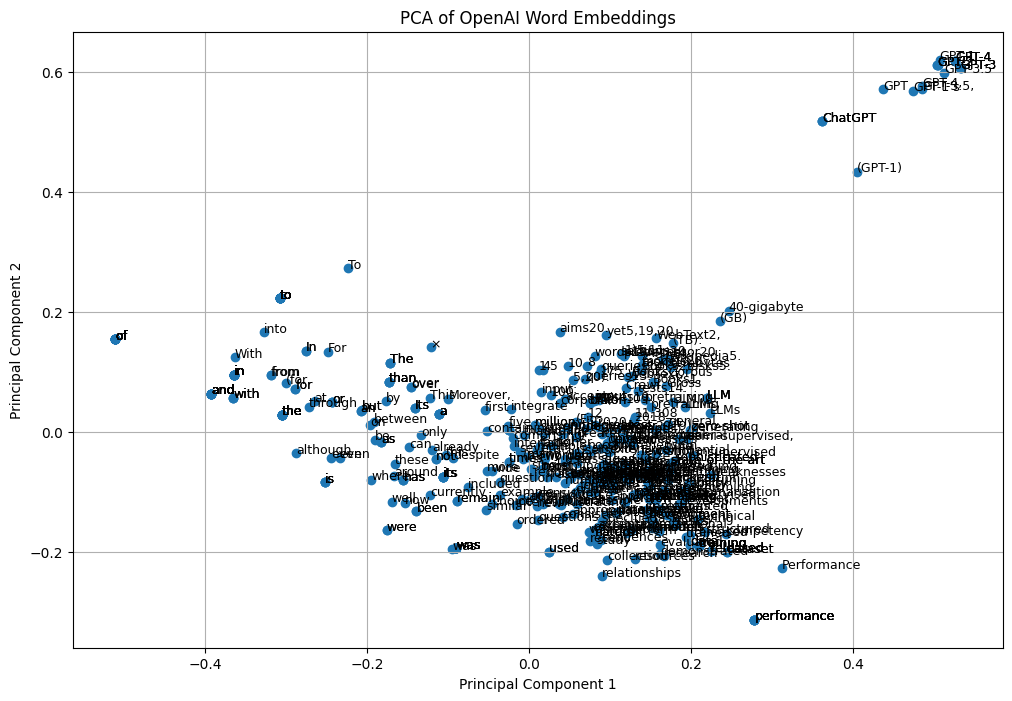

In [92]:
# Apply PCA to reduce embeddings to 2D
pca = PCA(n_components=2)
embeddings = pca.fit_transform(word_embeddings)

# Plot the PCA results with annotations
plt.figure(figsize=(12, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], marker='o')

# Annotate each point with the corresponding word
for i, word in enumerate(words_list):
    plt.annotate(word, (embeddings[i, 0], embeddings[i, 1]), fontsize=9)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of OpenAI Word Embeddings")
plt.grid(True)
plt.show()


# t-distributed Stochastic Neighbor Embedding (t-SNE)

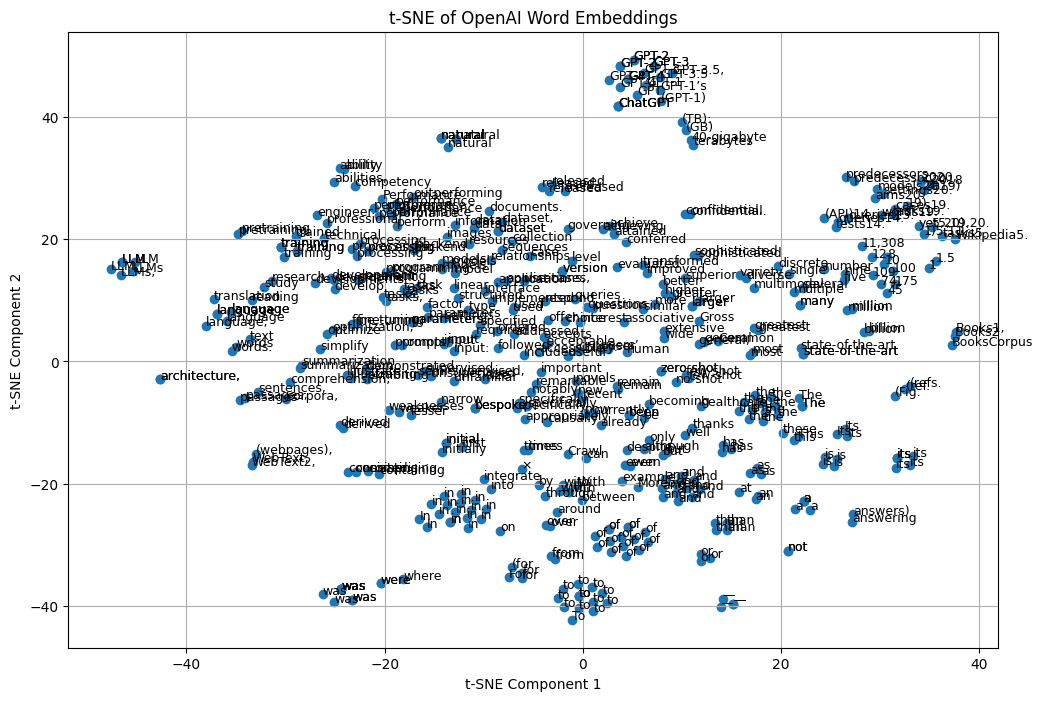

In [93]:
# Apply t-SNE to reduce embeddings to 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
embeddings = tsne.fit_transform(np.array(word_embeddings))

# Plot the t-SNE results with annotations
plt.figure(figsize=(12, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], marker='o')

# Annotate each point with the corresponding word
for i, word in enumerate(words_list):
    plt.annotate(word, (embeddings[i, 0], embeddings[i, 1]), fontsize=9)

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE of OpenAI Word Embeddings")
plt.grid(True)
plt.show()

# Uniform Manifold Approximation and Projection (UMAP)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


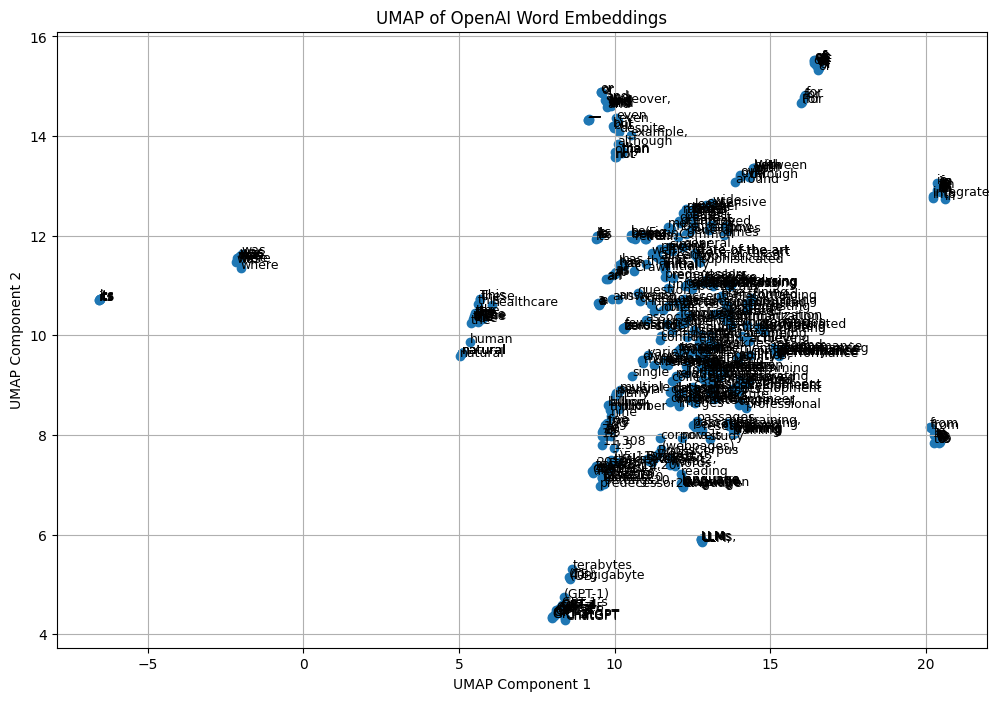

In [95]:
# Apply UMAP to reduce embeddings to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=0)
embeddings = umap_reducer.fit_transform(word_embeddings)

# Plot the UMAP results with annotations
plt.figure(figsize=(12, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], marker='o')

# Annotate each point with the corresponding word
for i, word in enumerate(words_list):
    plt.annotate(word, (embeddings[i, 0], embeddings[i, 1]), fontsize=9)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP of OpenAI Word Embeddings")
plt.grid(True)
plt.show()

# Explanation & Conclusion

 PCA provides a fairly linear distribution of words, with a densely packed center where most common words cluster, and a few outliers positioned far from the center (like "ChatGPT" and "GPT-4"). It is useful for capturing global structure. However, it doesn’t always capture local relationships (i.e., nuanced semantic clusters) effectively.

On the contrary, t-SNE emphasizes local structure, grouping similar words while seperating unrelated words apart. This makes it useful for visualizing clusters, but it does not preserve global distances well, so it may distort overall structure.

UMAP provides a balance between global and local structures. The plot shows a mix of dense regions and separated clusters. This means it perserves more of the high-dimensional data’s global structure while still highlighting local clusters.

Interesting findings from plots which also prove the above conclusions: PCA plot is the most dense, with a few outliers, which means it capture the global structure the best. t-SNE plot is the most seperable, which means it captures the local structure the best. UMAP plot is neither as dense as PCA plot nor as sperable as t-SNE plot, which shows the balance between global and local sturctures.